<a href="https://colab.research.google.com/github/misbahsy/ipython-notebooks/blob/master/ByOpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import sin
from math import pi
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from numpy.random import random
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot

Optima: x=0.900, y=0.810


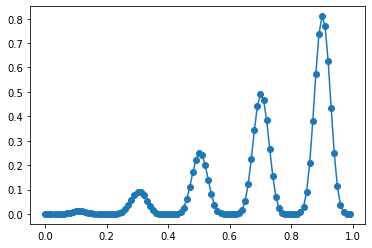

In [ ]:
#obj func
def objective(x, noise=0.1):
  noise = normal(loc=0, scale=noise)
  return (x**2 * sin(5 * pi * x)**6.0) + noise

#grid based sample of the domain [0,1]
X = arange(0, 1, 0.01)
#sample the domain without noise
y= [objective(x,0) for x in X]
#sample the domain with noise
ynoise= [objective(x,0) for x in X]
#find best result
ix = argmax(y)
print('Optima: x=%.3f, y=%.3f' %(X[ix], y[ix]))
#plot with noise
pyplot.scatter(X, ynoise)
#plot without noise
pyplot.plot(X, y)
#show the plot
pyplot.show()

In [ ]:
#obj func
def objective(x, noise=0.1):
  noise = normal(loc=0, scale=noise)
  return (x**2 * sin(5 * pi * x)**6.0) + noise

In [ ]:
def surrogate(model, X):
  with catch_warnings():
    simplefilter("ignore")
    return model.predict(X, return_std=True)

In [ ]:
def plot(X, y, model):
  pyplot.scatter(X, y)
  Xsamples = asarray(arange(0, 1, 0.001))
  Xsamples = Xsamples.reshape(len(Xsamples), 1)
  ysamples, _ = surrogate(model, Xsamples)
  pyplot.plot(Xsamples, ysamples)
  pyplot.show()

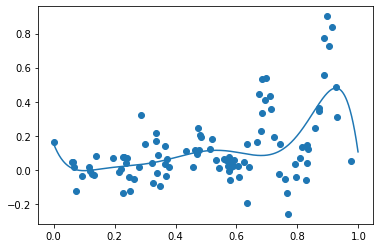

In [ ]:
X = random(100)
y = asarray([objective(x) for x in X])
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
model = GaussianProcessRegressor()
model.fit(X, y)
plot(X, y, model)

In [ ]:
def acquisition(X, Xsamples, model):
  #best surrogate score
  yhat, _ = surrogate(model, X)
  best  = max(yhat)
  #calc mean and stdev via surogate
  mu, std = surrogate(model, Xsamples)
  mu = mu[:, 0]
  #cal the PI
  probs = norm.cdf((mu - best)/ (std+1E-9))
  return probs

def opt_acquisition(X, y, model):
  #random search and samples
  Xsamples = random(100)
  Xsamples = Xsamples.reshape(len(Xsamples), 1)
  #calc acq func
  scores = acquisition(X, Xsamples, model)
  #locate index of largest scores
  ix = argmax(scores)
  return Xsamples[ix, 0]

>x=0.908, f()=0.467276, actual=0.719
>x=0.896, f()=0.467003, actual=0.780
>x=0.948, f()=0.496469, actual=0.274
>x=0.922, f()=0.503437, actual=0.604
>x=0.639, f()=0.084913, actual=-0.023
>x=0.923, f()=0.511818, actual=0.627
>x=0.950, f()=0.465708, actual=0.046
>x=0.933, f()=0.470275, actual=0.324
>x=0.891, f()=0.468928, actual=0.743
>x=0.429, f()=0.094843, actual=-0.112
>x=0.291, f()=0.025054, actual=0.189
>x=0.911, f()=0.499832, actual=0.856
>x=0.932, f()=0.491663, actual=0.494
>x=0.111, f()=0.001535, actual=-0.057
>x=0.146, f()=0.006084, actual=-0.047
>x=0.912, f()=0.519018, actual=0.572
>x=0.908, f()=0.521303, actual=0.876
>x=0.913, f()=0.538083, actual=0.721
>x=0.912, f()=0.546376, actual=0.759
>x=0.896, f()=0.544442, actual=0.764
>x=0.911, f()=0.564419, actual=0.847
>x=0.845, f()=0.411849, actual=-0.005
>x=0.354, f()=0.049219, actual=-0.083
>x=0.418, f()=0.080568, actual=0.072
>x=0.614, f()=0.083600, actual=0.026
>x=0.897, f()=0.553300, actual=0.830
>x=0.903, f()=0.572095, actual=0

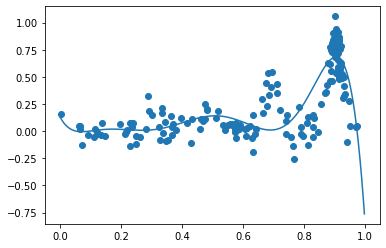

Best Result: x=0.904, y=1.058


In [ ]:
for i in range(100):
  x = opt_acquisition(X, y, model)
  actual = objective(x)
  est, _ =  surrogate(model, [[x]])
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
  X = vstack((X, [[x]]))
  y = vstack((y, [[actual]]))
  model.fit(X,y)

plot(X, y, model)
ix = argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))